In [1]:
from mixclu import *

In [8]:
SEED = 42
np.random.seed(SEED)
df = pd.read_csv('./datasets/churn.txt')

In [9]:
# preprocessing
id_col, cat_col, con_col = get_types(df)
id_col, cat_col, con_col

([],
 ['State', 'Phone', "Int'l Plan", 'VMail Plan', 'Churn?'],
 ['Account Length',
  'Area Code',
  'VMail Message',
  'Day Mins',
  'Day Calls',
  'Day Charge',
  'Eve Mins',
  'Eve Calls',
  'Eve Charge',
  'Night Mins',
  'Night Calls',
  'Night Charge',
  'Intl Mins',
  'Intl Calls',
  'Intl Charge',
  'CustServ Calls'])

total_columns..
State Int'l Plan VMail Plan Churn? Account Length VMail Message Day Mins Day Calls Day Charge Eve Mins Eve Calls Eve Charge Night Mins Night Calls Night Charge Intl Mins Intl Calls Intl Charge CustServ Calls
(2000, 19)
converting cat columns into object types..
 (2000, 19)
calculating missing values..
 (2000, 19)
Your selected dataframe has 19 columns.
total values 2000 There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values, col_name]
Index: []


imputing values.. (2000, 19)
encoding cat columns (2000, 19)
Final cat features Int'l Plan,Churn?,State,VMail Plan
encoding..
Int'l Plan 2
encoding..
Churn? 2
encoding..
State 51
encoding..
VMail Plan 2


/Users/monk/Desktop/MixClu/mixclu/preprocessing.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name] = df[col_name].astype(object)


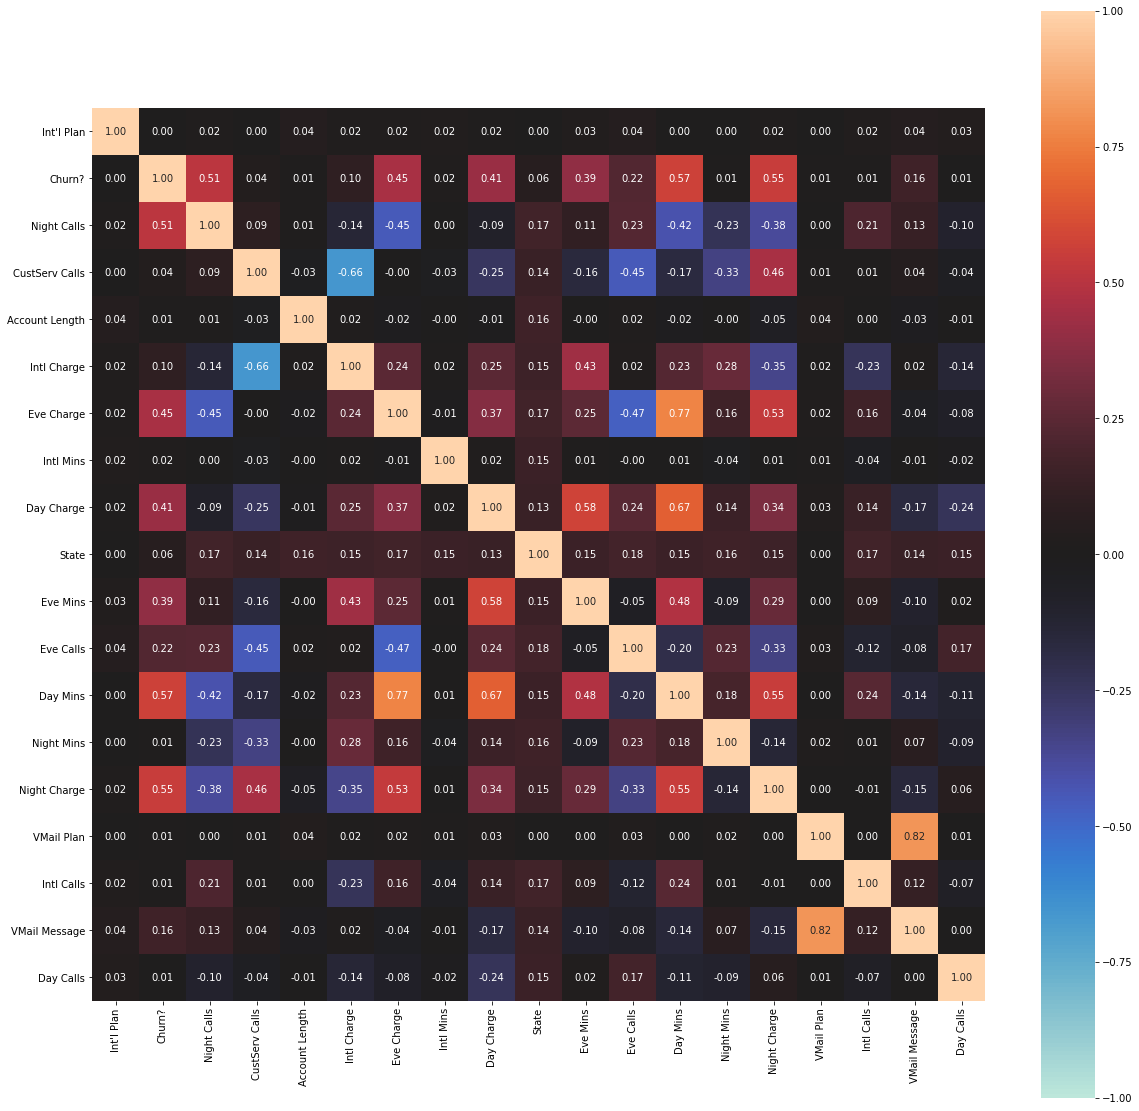

Final cat features Int'l Plan,Churn?,State,VMail Plan


In [12]:
cat_col = ['State', "Int'l Plan", 'VMail Plan', 'Churn?']
con_col = ['Account Length', 'VMail Message', 'Day Mins', 'Day Calls', 
           'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 
           'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 
           'Intl Charge', 'CustServ Calls']

df_pre = autopreprocessing(df, 
                  cat_col, 
                  id_columns      = None,
                  con_colmns      = con_col,
                  y               = None, 
                  allowed_missing = 20.0, 
                  corr_thr        = None)

In [16]:
df          = df_pre[0]
con_columns = con_col
cat_columns = cat_col

In [18]:
"""Model : 1"""

# 1. Cluster based on continuous data only


df_cos = df[con_columns]
result = kmeans_model(df_cos, 5, df_output = False)
result
# print(list(result['clusters'])[:10], y[:10])

{'clusters': array([3, 0, 4, ..., 1, 0, 4], dtype=int32),
 'model': KMeans(n_clusters=5, random_state=42)}

In [11]:
"""Model : 2"""

# 1. Cluster based on mix data with one hot encoding

one_hot_result1 = kmeans_onehot_mix(df, 
                                   cat_columns, 
                                   5, 
                                   scale = None, 
                                   df_output    = False)
print(list(one_hot_result1['clusters'])[:10], y[:10])

[2, 4, 0, 3, 4, 2, 1, 3, 4, 2] [4 1 0 3 1 4 2 3 1 4]


In [12]:
# k prototype result

"""Model : 3"""

k_proc_result = k_prot_model(df, cat_columns, 5)
print(list(k_proc_result['clusters'])[:10], y[:10])

[3, 1, 0, 4, 1, 3, 2, 4, 1, 3] [4 1 0 3 1 4 2 3 1 4]


In [13]:
""" Model : 4"""

y_tr = kmeans_famd(df, cat_columns, 5, 'auto')
print(list(y_tr['clusters'])[:10], y[:10])

explained_inertia :  0.99
[3, 2, 0, 1, 2, 3, 4, 1, 2, 3] [4 1 0 3 1 4 2 3 1 4]
